## Python and database connection

In [1]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [3]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

In [10]:
query = '''select distinct f.film_id, fc.category_id, f.rental_rate, f.rating, f.release_year, f.length, 
i.store_id,
concat(date_format(convert(r.rental_date,date), '%m'), '' , date_format(convert(r.rental_date,date), '%Y')) as last_month,
CASE
WHEN concat(date_format(convert(r.rental_date,date), '%m'), '' , date_format(convert(r.rental_date,date), '%Y')) = '022006' THEN '1'
ELSE '0'
END AS 'rented_last_month'
from rental r
join inventory i on r.inventory_id = i.inventory_id
join film_category fc on i.film_id = fc.film_id
join film f on i.film_id = f.film_id;'''

data = pd.read_sql_query(query, engine)
data.head()

,film_id,category_id,rental_rate,rating,release_year,length,store_id,last_month,rented_last_month
0,19,1,0.99,PG,2006,113,1,082005,0
1,19,1,0.99,PG,2006,113,1,062005,0
2,19,1,0.99,PG,2006,113,1,072005,0
3,19,1,0.99,PG,2006,113,1,052005,0
4,19,1,0.99,PG,2006,113,2,062005,0


In [11]:
data.shape

(5391, 9)

In [12]:
data.dtypes

film_id                int64
category_id            int64
rental_rate          float64
rating                object
release_year           int64
length                 int64
store_id               int64
last_month            object
rented_last_month     object
dtype: object

In [13]:
data = data.drop(['release_year'], axis = 1)

In [14]:
data.head()

,film_id,category_id,rental_rate,rating,length,store_id,last_month,rented_last_month
0,19,1,0.99,PG,113,1,082005,0
1,19,1,0.99,PG,113,1,062005,0
2,19,1,0.99,PG,113,1,072005,0
3,19,1,0.99,PG,113,1,052005,0
4,19,1,0.99,PG,113,2,062005,0


In [15]:
data['store_id'] = data['store_id'].astype('object')
data['category_id'] = data['category_id'].astype('object')

In [16]:
data.dtypes

film_id                int64
category_id           object
rental_rate          float64
rating                object
length                 int64
store_id              object
last_month            object
rented_last_month     object
dtype: object

In [172]:
data = data.drop(['release_year'], axis = 1) # as it has only 1 value of 2006

In [17]:
data['rating'].value_counts()

PG-13    1192
NC-17    1114
PG       1080
R        1063
G         942
Name: rating, dtype: int64

In [18]:
data.isna().sum()

film_id              0
category_id          0
rental_rate          0
rating               0
length               0
store_id             0
last_month           0
rented_last_month    0
dtype: int64

In [19]:
data.describe()

,film_id,rental_rate,length
count,5391.000000,5391.000000,5391.000000
mean,498.780189,2.943997,115.206084
std,288.429744,1.648780,39.909708
min,1.000000,0.990000,46.000000
25%,252.000000,0.990000,82.000000
50%,494.000000,2.990000,114.000000
75%,748.000000,4.990000,148.000000
max,1000.000000,4.990000,185.000000


In [23]:
import numpy as np
data_num1 = data[['rental_rate','length']]
data_cat = data.select_dtypes(include = np.object)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

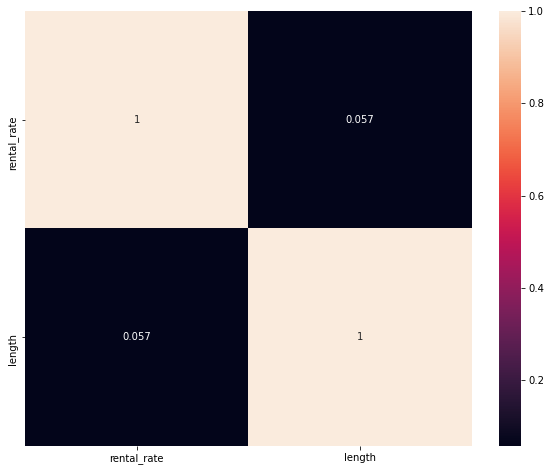

In [24]:
corr_matrix=data_num1.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [25]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import numpy as np

C:\Users\trang\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


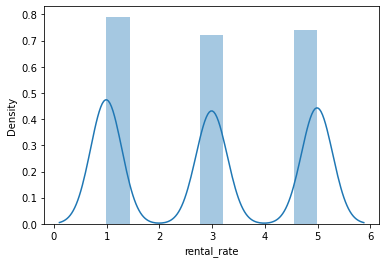

C:\Users\trang\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


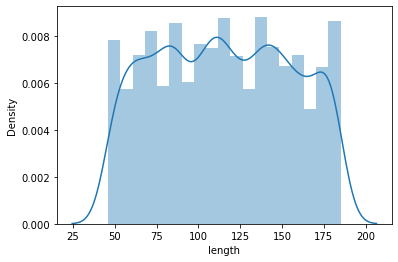

In [26]:
for x in data_num1.columns:
    sns.distplot(data_num1[x])
    plt.show()

In [27]:
#standard scaler
transformer = StandardScaler().fit(data_num1)
x_normalized = transformer.transform(data_num1)
print(x_normalized.shape)
data_norm = pd.DataFrame(x_normalized)
data_norm.head()

(5391, 2)


,0,1
0,-1.185227,-0.055282
1,-1.185227,-0.055282
2,-1.185227,-0.055282
3,-1.185227,-0.055282
4,-1.185227,-0.055282


C:\Users\trang\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


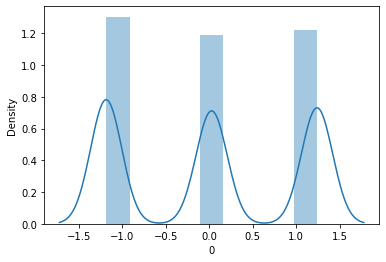

C:\Users\trang\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


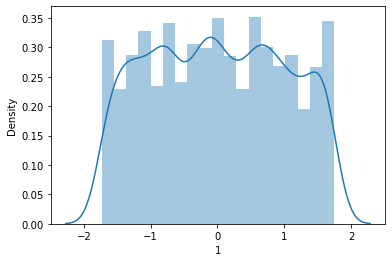

In [28]:
for x in data_norm.columns: 
    sns.distplot(data_norm[x])
    plt.show()

In [29]:
# normalizer
transformer = Normalizer().fit(data_num1)
x_normalizer = transformer.transform(data_num1)
print(x_normalizer.shape)
data_normalizer = pd.DataFrame(x_normalizer)
data_normalizer.head()

(5391, 2)


,0,1
0,0.008761,0.999962
1,0.008761,0.999962
2,0.008761,0.999962
3,0.008761,0.999962
4,0.008761,0.999962


C:\Users\trang\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


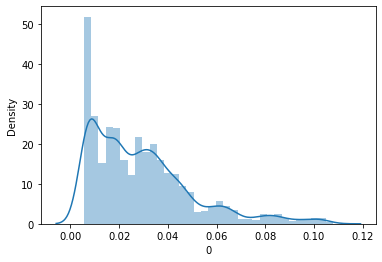

C:\Users\trang\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


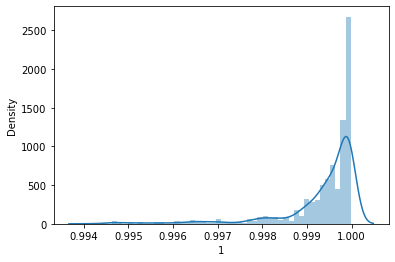

In [30]:
for x in data_normalizer.columns: 
    sns.distplot(data_normalizer[x])
    plt.show()

In [31]:
categorical = pd.get_dummies(data_cat)

In [32]:
categorical.head()

,category_id_1,category_id_2,category_id_3,category_id_4,category_id_5,category_id_6,category_id_7,category_id_8,category_id_9,category_id_10,...,store_id_1,store_id_2,last_month_012021,last_month_022006,last_month_052005,last_month_062005,last_month_072005,last_month_082005,rented_last_month_0,rented_last_month_1
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [35]:
#data_final = np.concatenate((data_normalizer, categorical, data_num2), axis=1)
data_final = np.concatenate((data_normalizer, categorical), axis=1)

In [36]:
data_final_df = pd.DataFrame(data_final)
data_final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.008761,0.999962,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.008761,0.999962,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.008761,0.999962,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.008761,0.999962,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.008761,0.999962,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [38]:
Y = data['rented_last_month']
X = data_final_df

In [39]:
from sklearn.model_selection import train_test_split
x_train_num, x_test_num, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(x_train_num, y_train)

In [41]:
print("The accuracy of the model in the TEST set is: ", round(classification.score(x_test_num, y_test),2))

The accuracy of the model in the TEST set is:  1.0


In [42]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_test, classification.predict(x_test_num))

array([[1721,    0],
       [   0,   59]], dtype=int64)

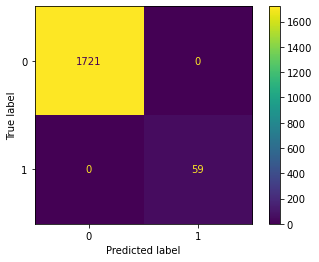

In [43]:
plot_confusion_matrix(classification, x_test_num, y_test)

In [44]:
from sklearn.metrics import cohen_kappa_score
predictions = classification.predict(x_test_num)
classification.score(x_test_num, y_test)
print (cohen_kappa_score(y_test, predictions))

1.0
